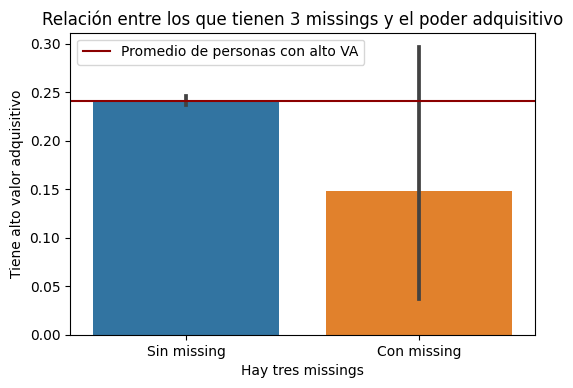

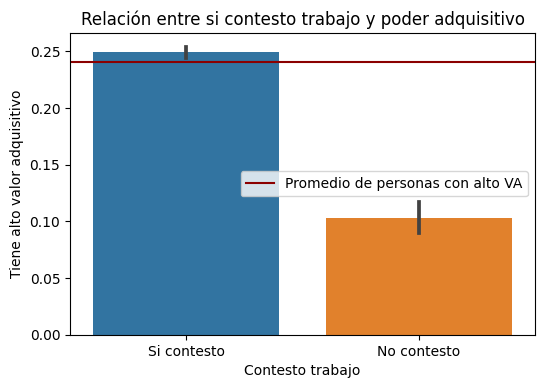

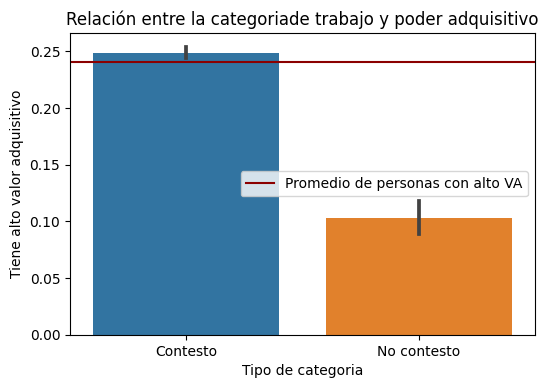

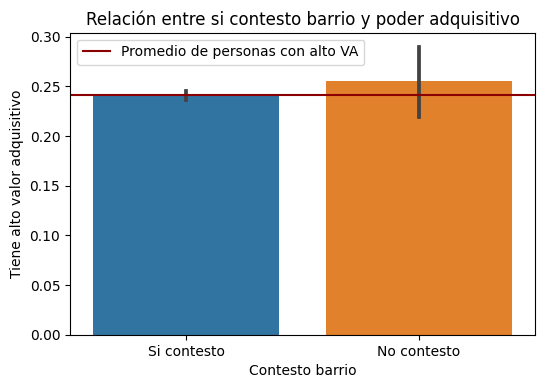

In [1]:
%run "../Secciones/feature_engineering.ipynb"

#### Edad

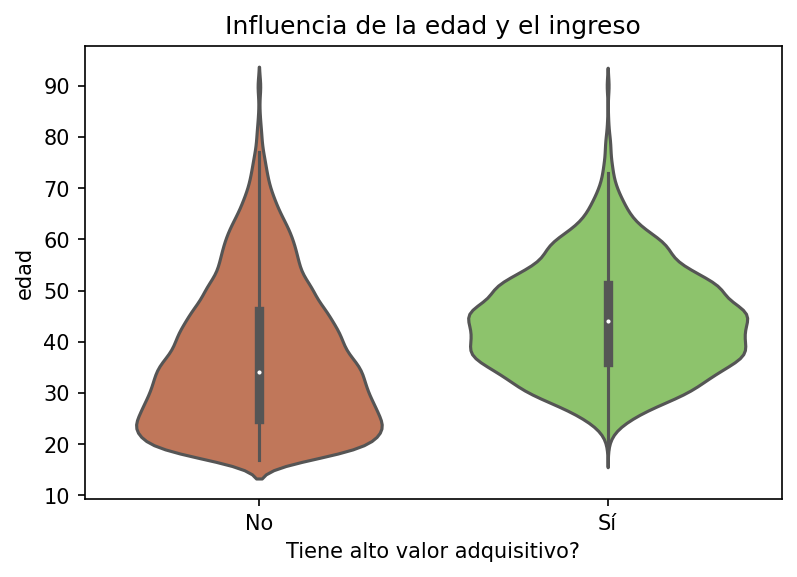

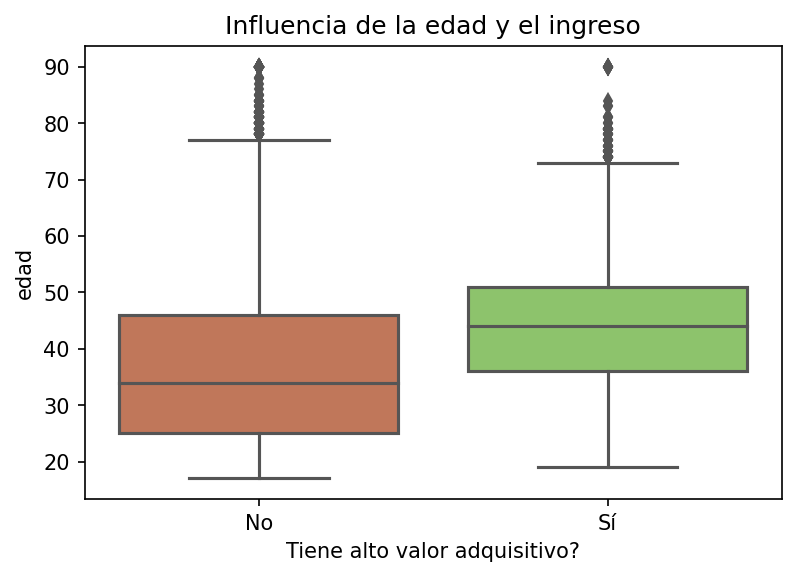

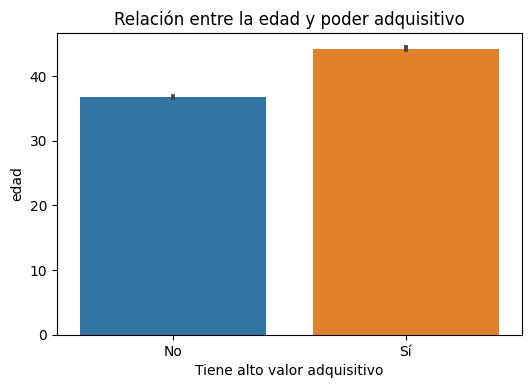

In [2]:
#VIOLINPLOT
plt.figure(dpi=150)
plt.title("Influencia de la edad y el ingreso")
sns.violinplot(
    data=df,
    y='edad',
    x='tiene_alto_valor_adquisitivo',
    palette=['#D17049', "#89D15E"],
)
plt.ylabel("edad")
plt.xlabel("Tiene alto valor adquisitivo?")
plt.xticks([False, True], ["No", "Sí"])
plt.show()

#BOXPLOT
plt.figure(dpi=150)
plt.title("Influencia de la edad y el ingreso")
sns.boxplot(
    data=df,
    y='edad',
    x='tiene_alto_valor_adquisitivo',
    palette=['#D17049', "#89D15E"],
)
ax.tick_params(which='both', width=2)
plt.ylabel("edad")
plt.xlabel("Tiene alto valor adquisitivo?")
plt.xticks([False, True], ["No", "Sí"])
plt.show()

#BARPLOT
plt.figure(dpi=100)
ax = sns.barplot(
    data=df,
    x='tiene_alto_valor_adquisitivo',
     y='edad')

plt.ylabel("edad")
plt.xlabel("Tiene alto valor adquisitivo")
plt.xticks([False, True], ["No", "Sí"])
plt.title('Relación entre la edad y poder adquisitivo')
plt.show()

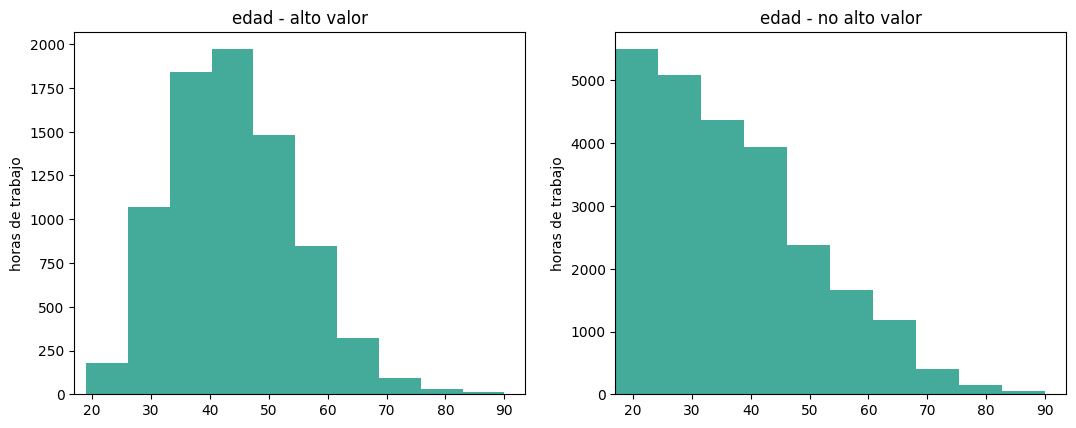

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=100)

df_alto_valor = df[df.tiene_alto_valor_adquisitivo == 1]
df_no_alto_valor = df[df.tiene_alto_valor_adquisitivo != 1]

df_alto_valor.edad.plot(kind='hist', ax=axes[0], xlim=df.edad.min(), color = (68/255,170/255 ,153/255))
axes[0].set_title("edad - alto valor")
axes[0].set_ylabel("horas de trabajo")

df_no_alto_valor.edad.plot(kind='hist', ax=axes[1], xlim=df.edad.min(),color = (68/255,170/255 ,153/255))
axes[1].set_title("edad - no alto valor")
axes[1].set_ylabel("horas de trabajo")

plt.show()

Existe gente con 80 anios trabajando? Pro-ble-mas

Notas:

+ ViolinPlot podemos ver la tendencia de la edad.(+)

+ Boxplot nos motro que hay gente con 90 que trabaja R.A.R.O.(-)

+ Barplot queda bien marcado la diferencia en la edad, 10 anios aprox.(+)

In [4]:
df_alto_valor[df_alto_valor['edad'] > 40].value_counts().sum()/df_alto_valor.value_counts().sum()

0.606226872527753

In [5]:
df[df['edad'] > 40].value_counts().sum()/df.value_counts().sum()

0.413041473237618

+ edad <= 30 no tiene alto valor adquisitivo tiene una efectividad relativa de 93,5% y global de 30%
+ edad <= 40 -> 0,838361617 -> 0,586958527

### Estado marital vs edad

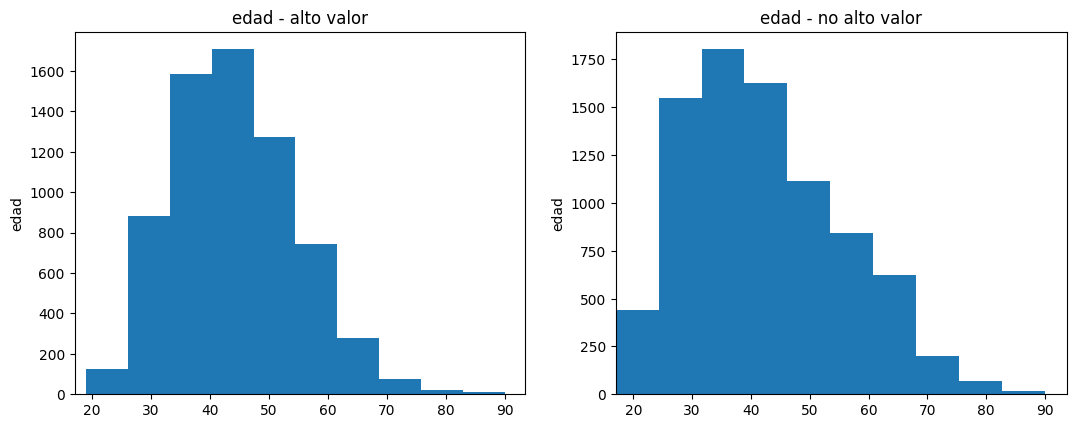

In [6]:
df_matrimonio = df[df['estado_marital'] == 'matrimonio']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=100)

df_mat_alto_valor = df_matrimonio[df_matrimonio['tiene_alto_valor_adquisitivo'] == 1]
df_mat_bajo_valor = df_matrimonio[df_matrimonio['tiene_alto_valor_adquisitivo'] != 1]

df_mat_alto_valor.edad.plot(kind='hist', ax=axes[0], xlim=df.edad.min())
axes[0].set_title("edad - alto valor")
axes[0].set_ylabel("edad")

df_mat_bajo_valor.edad.plot(kind='hist', ax=axes[1], xlim=df.edad.min())
axes[1].set_title("edad - no alto valor")
axes[1].set_ylabel("edad")

plt.show()

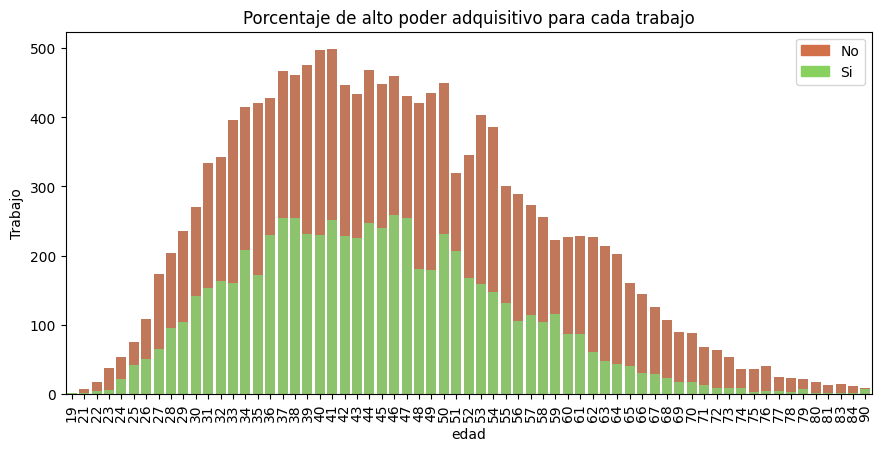

In [12]:
import matplotlib.patches as mpatches
plt.figure(figsize=(10.4, 4.8),  dpi=100)

total = df_matrimonio.groupby('edad')['tiene_alto_valor_adquisitivo'].sum().reset_index()
alto_valor = df_matrimonio[df_matrimonio.tiene_alto_valor_adquisitivo == 1].groupby('edad')['tiene_alto_valor_adquisitivo'].sum().reset_index()

alto_valor['tiene_alto_valor_adquisitivo'] = df_matrimonio[df_matrimonio.tiene_alto_valor_adquisitivo == 1].groupby('edad')['tiene_alto_valor_adquisitivo'].sum().reset_index()['tiene_alto_valor_adquisitivo'].tolist()
total['tiene_alto_valor_adquisitivo'] = df_matrimonio.groupby('edad')['anios_estudiados'].apply(lambda x: len(x)).tolist()

bar1 = sns.barplot(y="tiene_alto_valor_adquisitivo",  x="edad", data=total, color='#D17049')
bar2 = sns.barplot(y="tiene_alto_valor_adquisitivo", x="edad", data=alto_valor, color='#89D15E')

top_bar = mpatches.Patch(color='#D17049', label='No')
bottom_bar = mpatches.Patch(color='#89D15E', label='Si')
plt.legend(handles=[top_bar, bottom_bar])
plt.title("Porcentaje de alto poder adquisitivo para cada trabajo")
plt.ylabel("Trabajo")
plt.xticks(rotation = 90)

plt.show()

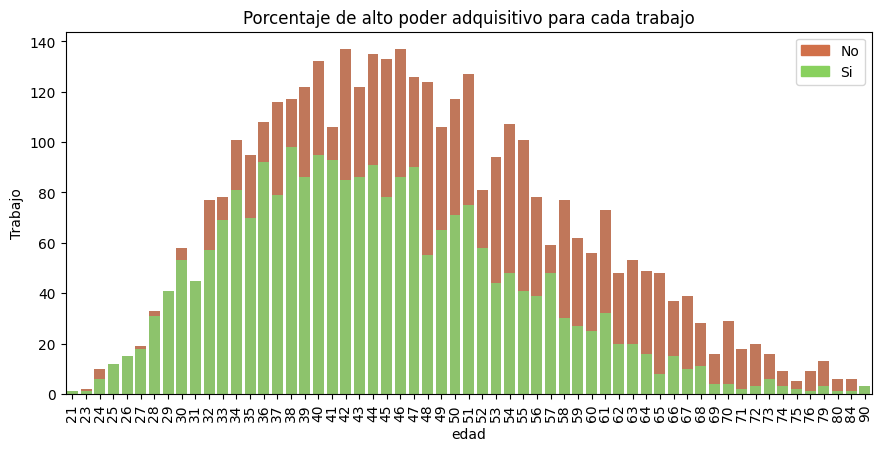

In [24]:
plt.figure(figsize=(10.4, 4.8),  dpi=100)

df_trabajo = df_matrimonio[(df_matrimonio['trabajo'] == 'director_gerente')| (df_matrimonio['trabajo'] == 'profesional_especializado') | (df_matrimonio['trabajo'] == 'ventas')]


total = df_trabajo.groupby('edad')['tiene_alto_valor_adquisitivo'].sum().reset_index()
alto_valor = df_trabajo[df_trabajo.tiene_alto_valor_adquisitivo == 1].groupby('edad')['tiene_alto_valor_adquisitivo'].sum().reset_index()

alto_valor['tiene_alto_valor_adquisitivo'] = df_trabajo[df_trabajo.tiene_alto_valor_adquisitivo == 1].groupby('edad')['tiene_alto_valor_adquisitivo'].sum().reset_index()['tiene_alto_valor_adquisitivo'].tolist()
total['tiene_alto_valor_adquisitivo'] = df_trabajo.groupby('edad')['anios_estudiados'].apply(lambda x: len(x)).tolist()

bar1 = sns.barplot(y="tiene_alto_valor_adquisitivo",  x="edad", data=total, color='#D17049')
bar2 = sns.barplot(y="tiene_alto_valor_adquisitivo", x="edad", data=alto_valor, color='#89D15E')

top_bar = mpatches.Patch(color='#D17049', label='No')
bottom_bar = mpatches.Patch(color='#89D15E', label='Si')
plt.legend(handles=[top_bar, bottom_bar])
plt.title("Porcentaje de alto poder adquisitivo para cada trabajo")
plt.ylabel("Trabajo")
plt.xticks(rotation = 90)

plt.show()

In [28]:


df_mat_bajo_valor[df_mat_bajo_valor['edad'] <= 60].value_counts().sum()/df_no_alto_valor.value_counts().sum() * 100


29.890643985419196

In [ ]:
df_matrimonio[df_matrimonio['edad'] >= 40].value_counts().sum()/df_matrimonio.value_counts().sum() * 100

In [ ]:
df_mat_alto_valor.value_counts().sum()/df_matrimonio.value_counts().sum()

In [ ]:
condicion = (df['trabajo'] != 'directivo_gerente') & (df['trabajo'] != 'profesional_especializado') & (df['trabajo'] != 'ventas')
df_sm_nt = df[(df['estado_marital'] == 'matrimonio') & (condicion)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=100)

df_sm_nt_alto_valor = df_sm_nt[df_sm_nt['tiene_alto_valor_adquisitivo'] == 1]
df_sm_nt_bajo_valor = df_sm_nt[df_sm_nt['tiene_alto_valor_adquisitivo'] != 1]

df_sm_nt_alto_valor.edad.plot(kind='hist', ax=axes[0], xlim=df_sm_nt.anios_estudiados.min())
axes[0].set_title("horas de trabajo - alto valor")
axes[0].set_ylabel("horas de trabajo")

df_sm_nt_bajo_valor.edad.plot(kind='hist', ax=axes[1], xlim=df_sm_nt.anios_estudiados.min())
axes[1].set_title("horas de trabajo - no alto valor")
axes[1].set_ylabel("horas de trabajo")

plt.show()

In [ ]:
df_sm_nt_alto_valor[df_sm_nt_alto_valor['anios_estudiados'] >= 14.5].value_counts().sum()/df_alto_valor.value_counts().sum() * 100

In [ ]:
df_sm_nt_bajo_valor[df_sm_nt_bajo_valor['anios_estudiados'] >= 14.5].value_counts().sum()/df_no_alto_valor.value_counts().sum() * 100

In [ ]:
condicion = (df['trabajo'] != 'directivo_gerente') & (df['trabajo'] != 'profesional_especializado') & (df['trabajo'] != 'ventas')
df_sm_nt = df[(df['estado_marital'] == 'matrimonio') & (condicion) & (df['trabajo'] == 'reparador')]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[6.4 * 2, 4.8], dpi=100)

df_sm_nt_alto_valor = df_sm_nt[df_sm_nt['tiene_alto_valor_adquisitivo'] == 1]
df_sm_nt_bajo_valor = df_sm_nt[df_sm_nt['tiene_alto_valor_adquisitivo'] != 1]

df_sm_nt_alto_valor.edad.plot(kind='hist', ax=axes[0], xlim=df_sm_nt.horas_trabajo_registradas.min())
axes[0].set_title("horas de trabajo - alto valor")
axes[0].set_ylabel("horas de trabajo")

df_sm_nt_bajo_valor.edad.plot(kind='hist', ax=axes[1], xlim=df_sm_nt.horas_trabajo_registradas.min())
axes[1].set_title("horas de trabajo - no alto valor")
axes[1].set_ylabel("horas de trabajo")

plt.show()

In [ ]:
df.columns